---
안녕하세요. Data Will 팀입니다. <br>
저희 프로젝트는 최근 화두가 되고 있는 **'MZ 세대'**에 대해서 분석하고, 은행 및 금융권에서 분석결과를 활용할 방법을 찾고자 출발했습니다. <br>
또한, 마침 우리 팀이 20대 2명, 30대 1명인 MZ 세대로 구성되어 더욱 관심을 가지고 프로젝트를 수행할 수 있었습니다. <br>
아직 부족하지만 재미있게 읽어주시고, 피드백이나 궁금한 사항들은 댓글 남겨주시면 감사하겠습니다. :)
---

# 목차

**Intro: 들어가며**
    
**0. 라이브러리 및 데이터 불러오기** <br>
    
**1. Data Collection: 데이터 수집** <br>
* 1.1 신한은행 데이터 
* 1.2 BC카드 데이터
* 1.3 한국투자증권 데이터
* 1.4 KRX 데이터

**2. EDA(Exploratory Data Analysis): 데이터 분석** <br>
* 2.1 소득 및 자산
* 2.2 소비
* 2.3 투자
    
**3. Modeling: 모델링** <br>
* 3.1 K-means
* 3.2 Decision Tree
    
**4. Conclusion and Insight: 결론 및 아이디어 제시** <br>
    
**5. 참고자료**

# Intro: 들어가며
## <font size = 4><span style="color:#81B622">*은행 및 금융권은 왜 MZ세대에 열광할까*</font>

MZ세대는 과거와 달리 자산운용은 물론 금융회사가 제공하는 서비스 활용에 적극적입니다. 또한 금융 장벽이 빠르게 허물어지고 빅테크기업들과의 경쟁이 시작되었기 때문에 이 경쟁을 이끄는 주체인 MZ세대를 제대로 분석하고 공략해야합니다. 따라서, 우리팀은 팀원 모두가 MZ세대로서 MZ세대의 관점에서 꼭 필요한 금융상품을 알아내기 위해 데이터 분석을 해보았습니다.

데이터 분석은 아래와 같이 크게 세 분야로 나누어 진행했습니다.
  
* **MZ 세대의 소득 및 자산**

  <br>
  <br>
* **MZ 세대의 소비**
 + 1-1. 코로나 전과 후로 달라진 MZ세대들의 소비 패턴을 분석합니다.
 + 1-2. MZ 세대들의 소비 패턴이 달라진 인과 관계를 데이터에서 파악합니다.
 + 1-3. M세대와 Z세대의 소비 패턴을 분석합니다.
<br>
<br>    
* **MZ 세대의 투자**
 + 1-1. 
 + 1-2. MZ세대가 '동학개미운동' 에 기여한 부분을 분석합니다.
 + 1-3. MZ세대의 주식투자 특징을 데이터에서 파악합니다.
 


In [1]:
# 프로젝트 구성 소개
# Image('')

# 0. 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline
import pyecharts
from pyecharts import *
from datetime import datetime
from IPython.display import Image
from pyecharts import Line
from pyecharts import Bar
from pyecharts import online
online()

## pyecharts 라이브러리가 import 되지 않을 경우 아래 라이브러리를 install 해주세요.
## pip install pyecharts==0.5.11
## pip install pyecharts-snapshot

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Data Collection: 데이터 수집

## 1.1 데이터 출처 및 설명
### 1.1.1 데이터 출처
- 신한은행 데이터, 서울시 지역단위 '소득', '지출', '금융자산' <br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=6e7665e9-af0e-11eb-9f58-f220ef21bb88<br>
<br>
- BC카드 데이터, 온라인 품목별 소비데이터
<br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=ff9d6fe3-aed0-11eb-9f58-f220ef21bb88<br>
<br>
- 한국투자증권 데이터, 동학개미운동 신규 고객 투자 정보
<br>https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=410eb5df-e38b-11eb-9f58-f220ef21bb88<br>
<br>
- KRX 데이터, KOSPI, KOSDAQ 업종분류 현황
<br>http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201

### 1.1.2 데이터 설명
- 신한은행 데이터: 2019년~2021년의 3월, 9월 월별로 서울시에 거주하는 신한은행 거래 고객의 지역(집계구), 직장인여부, 성별, 연령구분에 따른 평균 금융 정보 데이터<br>
<br>
- BC카드 데이터: 2019년~2021년 3월, 9월 월별로 온라인 품목(대/중분류) 상세 매출 데이터<br>
<br>
- 한국투자증권 데이터: 동학개미운동(20.01.20~20.03.31) 기간 동안 한국투자증권에 신규 고객으로 등록하고 국내주식을 매매한 고객 약 27만명 중, 거래내역 횟수가 총 30회 이상인 고객 약 2.5만명(10% 수준) 랜덤추출한 데이터<br>
<br>
- KRX 데이터: 한국거래소가 개설한 KRX 정보데이터시스템에서 제공하는 데이터 중 코스피, 코스닥에 상장된 종목의 업종과 시가총액을 추출한 데이터

## 1.2 데이터 로드

### 1.2.1 신한은행 데이터 로드

In [3]:
fd1 = pd.read_excel('c:\\data\\fin\\finance_data201903.xlsx')
fd2 = pd.read_excel('c:\\data\\fin\\finance_data201909.xlsx')
fd3 = pd.read_excel('c:\\data\\fin\\finance_data202003.xlsx')
fd4 = pd.read_excel('c:\\data\\fin\\finance_data202009.xlsx')
fd5 = pd.read_excel('c:\\data\\fin\\finance_data202103.xlsx')
shin = pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0)
shin.head()

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


### 1.2.2 BC카드 데이터 로드

In [4]:
bc = pd.read_csv('C:\\data\\fin\\금융보안원_경진대회_데이터(최종제출).csv')
bc.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


### 1.2.3 한국투자증권 데이터 로드

In [5]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


### 1.2.4 KRX 데이터 로드

In [6]:
kospi = pd.read_csv('c:\\data\\fin\\kospi.csv', encoding='euckr')
kospi.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,095570,AJ네트웍스,KOSPI,서비스업,4920,-180,-3.53000,230365691400
1,006840,AK홀딩스,KOSPI,기타금융,30400,200,0.66000,402725854400
2,027410,BGF,KOSPI,기타금융,5270,10,0.19000,504427488570
3,282330,BGF리테일,KOSPI,유통업,169000,0,0.00000,2920980114000
4,138930,BNK금융지주,KOSPI,기타금융,6760,-40,-0.59000,2203322262960


In [7]:
kosdaq = pd.read_csv('c:\\data\\fin\\kosdaq.csv', encoding='euckr')
kosdaq.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,060310,3S,KOSDAQ,기계·장비,2950,95,3.33000,132077821850
1,054620,APS홀딩스,KOSDAQ,금융,13800,450,3.37000,281440249800
2,265520,AP시스템,KOSDAQ,반도체,33300,1700,5.38000,482191559100
3,211270,AP위성,KOSDAQ,통신장비,7380,100,1.37000,110809253520
4,035760,CJ ENM,KOSDAQ,방송서비스,153500,700,0.46000,3366125139000


## 1.3 데이터 전처리

### 1.3.1 신한은행 데이터 전처리

In [8]:
# 결측치 확인.
shin.isnull().sum()

기준년월        0
지역구         0
법정동코드       0
법정동         0
집계구코드       0
나이          0
성별          0
직장인여부       0
급여입금        0
가맹점매출입금     0
연금입금        0
총소비금액       0
총수신금액       0
예적금금액       0
신탁금액        0
수익증권금액      0
신용대출금액      0
담보대출금액      0
주택대출금액      0
전세자금대출금액    0
dtype: int64

In [9]:
# 명목형 변수 확인.
shin[shin.columns[shin.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
지역구,1039568,25,송파구,68405
법정동,1039568,451,신림동,27423


In [10]:
# 법정동 코드와 집계구 코드는 지역구, 법정동 컬럼과 중복되므로 삭제.
shin1=shin.drop(['법정동코드','집계구코드'],axis=1)
shin1.head()

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0


In [11]:
shin1.나이.unique() #연령데이터 종류확인.

array([2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
# MZ 세대와 기성세대를 구분하기 위한 컬럼을 추가하였습니다.
shin2=shin1.copy() #데이터 복사.
shin2['MZ여부']=np.nan
shin2['MZ여부']=shin2.나이.apply(lambda x: 'MZ세대' if (x==2)|(x==3) else '기성세대') #나이 컬럼이 2나3이면 MZ세대로 분류
shin2.head(10)

,기준년월,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,MZ여부
0,201903,강남구,역삼동,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0,MZ세대
1,201903,강남구,역삼동,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0,MZ세대
2,201903,강남구,역삼동,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0,MZ세대
3,201903,강남구,역삼동,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0,MZ세대
4,201903,강남구,역삼동,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0,기성세대
5,201903,강남구,역삼동,4,2,0,0,0,0,2330555,4489894,11315996,0,0,0,0,0,0,기성세대
6,201903,강남구,역삼동,5,1,0,0,0,0,0,1718292,0,0,0,0,0,0,0,기성세대
7,201903,강남구,역삼동,5,2,0,0,0,0,1958226,818597,0,0,0,0,0,0,0,기성세대
8,201903,강남구,역삼동,6,1,0,0,0,0,0,866337,0,0,0,0,0,0,0,기성세대
9,201903,강남구,역삼동,6,2,0,0,0,0,0,3216154,0,0,0,0,0,0,0,기성세대


### 1.3.2 BC 카드 데이터 전처리

In [13]:
# 결측치 확인.
bc.isnull().sum()

기준년월          0
품목대분류코드       0
품목대분류명        0
품목중분류코드       0
품목중분류명        0
성별            0
연령            0
가구생애주기        0
고객소재지_광역시도    0
고객소재지_시군구     0
고객소재지_읍면동     0
매출금액          0
매출건수          0
dtype: int64

In [14]:
# 필요없는 컬럼 제거 + 명목형 변수 바꾸기 힘든 컬럼도 제거.
bc.drop(['고객소재지_광역시도','고객소재지_시군구','고객소재지_읍면동'],axis=1,inplace=True)
bc.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,1656740,58


In [15]:
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

In [16]:
# 연령, 성별, 세대별 구분을 위해 파생변수를 추가 하였습니다.
# 연령 컬럼 1,2,3,4,5,6
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

In [17]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

In [18]:
# 파생변수 추가 매출평균.
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

In [19]:
# mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

### 1.3.3 한국투자증권 데이터 전처리

In [20]:
# '동일나이군구분코드' 컬럼을 기준으로 그룹핑. 나머지 컬럼들은 total 값 출력.
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,4060642033498,269053,382105,515532,325214,247487,5486249750,19979613,19531417,110896781229,5242832407,5343511798,5691140948,5075097247,5382851889,3866126325820,53510134065678224
30,6680176594743,467309,624834,843653,547193,423837,10681273617,43388094,42122128,336150710942,10253291765,10425714669,11048043974,9917404254,10475675410,5206734216162,93396442834166480
40,4245839638967,294604,400608,526415,354629,255375,7726204338,30680689,29851634,279829509695,7526615366,7616293398,7989890189,7259548425,7601916609,2852733541776,60060063105956968
50,2101578090943,151703,201507,261143,175284,136101,3876698362,26112296,25300021,197750419260,3780705834,3814462072,3990229785,3640245054,3800247418,1292544857681,27282288310802544


In [21]:
# '동일나이군구분코드' 컬럼을 기준으로 그룹핑. 나머지 컬럼들은 평균값 출력.
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,"20,200,290",1,2,3,2,1,"27,292",99,97,"551,673","26,081","26,582","28,311","25,247","26,778","19,232,641","266,194,409,810"
30,"20,200,294",1,2,3,2,1,"32,299",131,127,"1,016,492","31,005","31,526","33,408","29,989","31,678","15,744,728","282,423,012,105"
40,"20,200,296",1,2,3,2,1,"36,759",146,142,"1,331,336","35,809","36,236","38,013","34,539","36,167","13,572,360","285,745,850,628"
50,"20,200,295",1,2,3,2,1,"37,263",251,243,"1,900,770","36,340","36,664","38,354","34,990","36,528","12,423,896","262,236,399,654"


### 1.3.4 KRX 데이터 전처리

In [22]:
# kospi, kosdaq 데이터프레임에서 필요한 컬럼만 추려 kos 데이터프레임 생성.
kospi2 = kospi[['종목코드', '업종명', '시가총액']]
kosdaq2 = kosdaq[['종목코드', '업종명', '시가총액']]
kos = pd.concat([kospi2, kosdaq2], axis=0)

In [23]:
# kos 와 merge 하기 위해 han 의 종목코드 컬럼을 kos 와 동일하게 수정.
han['종목코드'] = han['상품번호'].str[-6:]
han_merge = pd.merge(han, kos, how='inner', on='종목코드')
print(han_merge.shape)
han_merge.head()

(837987, 27)


,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,종목코드,업종명,시가총액
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795
1,A00010027,20200326,1,40,경기,2,00000A091970,나노캠텍,3,1,1,1630,1396,1396,2275480,1485,1580,1695,1520,1615,2471054,4018881455,N,N,091970,화학,60535578795
2,A00010338,20200128,1,40,경남,1,00000A091970,나노캠텍,3,2,1,3800,440,440,1672000,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795
3,A00011111,20200325,1,40,대전,2,00000A091970,나노캠텍,3,1,1,1510,270,270,409050,1415,1495,1525,1450,1485,1093463,1622381985,N,N,091970,화학,60535578795
4,A00012185,20200128,1,20,경기,3,00000A091970,나노캠텍,3,2,1,4030,246,246,990150,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795


# 2. EDA(Exploratory Data Analysis): 데이터 분석

## 2.1 소득 및 자산 EDA (from 신한은행데이터)

### 2.1.1 소득 및 자산(대출 포함): 급여입금, 가맹점매출입금, 연금입금, 신용대출금액, 담보대출금액, 주택대출금액, 전세자금대출금액

In [24]:
gp_s=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['급여입금','가맹점매출입금','연금입금','신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']].mean()
gp_s

,기준년월,MZ여부,급여입금,가맹점매출입금,연금입금,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,MZ세대,"159,727",390,12,"293,420","1,321,499","17,150","391,918"
1,201903,기성세대,"71,355","6,133","26,198","244,447","2,009,165","196,469","27,147"
2,201909,MZ세대,"178,639",365,18,"372,462","1,423,676","17,702","453,136"
3,201909,기성세대,"83,974","4,451","27,614","274,349","1,908,864","169,420","14,777"
4,202003,MZ세대,"183,200",305,15,"458,979","1,835,783","29,659","750,813"
5,202003,기성세대,"93,808","2,429","31,054","357,779","1,848,711","270,054","13,764"
6,202009,MZ세대,"205,544",139,18,"633,494","2,358,266","38,799","898,133"
7,202009,기성세대,"98,572","2,533","31,107","412,470","1,914,845","243,773","28,782"
8,202103,MZ세대,"207,775",446,26,"744,406","2,999,019","47,458","1,212,809"
9,202103,기성세대,"105,987","3,670","34,673","489,276","2,071,392","254,680","45,407"


### ▶ 가맹점 매출입금의 비록 자영업자가 여러 은행을 통해 매출입금을 받는다고 하더라도 그 규모 차이가 상당히 크기 때문에 기성세대의 자영업자 수가 많다는 것을 볼 수 있다.
-> 가맹점 매출입금액이 MZ 세대에 비해 기성세대가 눈에 띄게 높기 때문에 자영업자 수는 MZ 세대에 비해 기성세대가 더 많다는 것을 알 수 있습니다.

->

### ▶MZ 세대는 창업(자영업)보다 안정적으로 소득을 얻을 수 있는 직장을 더 선호한다.
<- MZ 세대는 아직 자본금을 모으지 못했기 때문에 창업을 할 수 없어서 일수도 있지 않을까요? 너무 추측으로, POC 위배..

### ▶연금입금액은 경우에는 대부분의 경우가 고령층 연금수령에 해당하기 때문에 큰 격차가 있는 것으로 보인다.
-> 연금입금액은 MZ 세대에 비해 기성 세대가 눈에 띄게 높은 것은 주요 연금 수령 대상자인 고령층이 기성 세대에 포함되어 있기 때문으로 보입니다.

### (추가) 주택대출금액금액이 MZ 세대에 비해 기성세대가 눈에 띄게 높은 것은 MZ 세대에 비해 기성 세대가 주택을 구입하기 위한 대출을 더 많이 받았기 때문인 것으로 보입니다.

### ● 급여입금

In [25]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['급여입금'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['급여입금'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('MZ세대와 기성세대 급여입금 비교',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### MZ세대와 기성세대의 평균 급여입금액은 약 2배정도 차이가 있지만, 20대는 상대적으로 미취직자가 많이 존재할 것으로 예상되고, 기성세대에도 은퇴한 사람들이 상당수 존재할 것으로 예상되기 때문에 좀 더 자세한 분석이 필요하다고 생각됩니다. 따라서, 나이대별로 Grouping 하여 추가 분석을 실시하고자 합니다.

In [27]:
gp_s2=shin2.groupby(['기준년월','나이'],as_index=False)[['급여입금']].mean()
gp_s2.head(12)

,기준년월,나이,급여입금
0,201903,2,"28,585"
1,201903,3,"272,614"
2,201903,4,"165,514"
3,201903,5,"84,254"
4,201903,6,"6,272"
5,201903,7,"1,002"
6,201909,2,"42,256"
7,201909,3,"296,850"
8,201909,4,"196,212"
9,201909,5,"97,142"


### ▶ 급여입금액의 평균은 " 30대 > 40대 > 50대 > 20대 >60대 " 로 경제활동의 중심인 30대와 40대가 다른세대에 비해 가장 높은 급여를 받고 있습니다.

In [28]:
attr1 = list(gp_s2['기준년월'][gp_s2['나이']==2])
attr2 = list(gp_s2['기준년월'][gp_s2['나이']==3])
attr3 = list(gp_s2['기준년월'][gp_s2['나이']==4])
attr4 = list(gp_s2['기준년월'][gp_s2['나이']==5])
attr5 = list(gp_s2['기준년월'][gp_s2['나이']==6])
attr6 = list(gp_s2['기준년월'][gp_s2['나이']==7])

v1 = list(gp_s2['급여입금'][gp_s2['나이']==2].round())
v2 = list(gp_s2['급여입금'][gp_s2['나이']==3].round())
v3 = list(gp_s2['급여입금'][gp_s2['나이']==4].round())
v4 = list(gp_s2['급여입금'][gp_s2['나이']==5].round())
v5 = list(gp_s2['급여입금'][gp_s2['나이']==6].round())
v6 = list(gp_s2['급여입금'][gp_s2['나이']==7].round())

bar = Bar('연령대별 평균 급여입금액 비교',width=1000)
bar.add('20대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('30대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('40대', attr3, v3, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('50대', attr4, v4, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('60대', attr5, v5, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('70대', attr6, v6, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶ 경제활동의 중심이 되는 30대, 40대, 50대에서는 시간이 경과하면서 평균 급여가 상승하는 모습을 보이고 있습니다.
### ▶ 20대의 소득은 일정하지 않고 증감을 반복하고 있습니다. 
### ▶20대는 주로 아르바이트와 같은 기간제, 비정규직 비중이 높기 때문인 것으로 보인다.
### ▶ 또한 다른 세대에 비해 20대의 회사 퇴사율이 높기 때문에 위 가정이 뒷받침된다.
### -> 또한, 20 대는 다른 세대에 비해 회사 퇴사율이 높습니다. 이것은 20대가 주로 아르바이트와 같은 기간제, 비정규직에 종사하기 때문으로 보입니다.

## => MZ세대의 소득 특징
### ▶20대는 경제적으로 불안정한 경우가 많고 그 규모가 다른 경제활동 세대에 비해 작습니다.
### ▶30대는 기성세대보다도 경제적으로 안정되어있고 다른세대에 비해 급여가 상당히 높습니다.

### ● 신용대출금액

In [30]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['신용대출금액'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['신용대출금액'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('신용대출금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶MZ세대와 기성세대 모두 신용대출금액이 점차 증가했으나 기성세대에 비해 MZ세대의 신용대출금액 증가폭이 더 컸습니다.

### ▶ 코로나 이후 MZ세대의 신용대출금액의 증가폭이 커졌다는 점을 고려하면, MZ세대의  빛투 영끌과 같은 고위험 고수익 투자 성향 때문인 것으로 보입니다. 이와 관련해서, 관련된 추가 분석을 투자 EDA 에서 진행하겠습니다.

## 2.2 소비 EDA (from 신한은행 데이터, BC 카드 데이터)

### 2.2.1 신한은행 데이터 소비

In [32]:
gp_d=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['총소비금액']].mean()
gp_d.head()

,기준년월,MZ여부,총소비금액
0,201903,MZ세대,"1,112,414"
1,201903,기성세대,"1,201,621"
2,201909,MZ세대,"1,179,094"
3,201909,기성세대,"1,307,001"
4,202003,MZ세대,"1,025,564"


In [33]:
attr1 = list(gp_d['기준년월'][gp_d['MZ여부']=='MZ세대'])
attr2 = list(gp_d['기준년월'][gp_d['MZ여부']=='기성세대'])
v1 = list(gp_d['총소비금액'][gp_d['MZ여부']=='MZ세대'].round())
v2 = list(gp_d['총소비금액'][gp_d['MZ여부']=='기성세대'].round())
bar = Bar('총소비금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [35]:
shin2.groupby(['나이'],as_index=False)[['총소비금액']].mean()

,나이,총소비금액
0,2,"882,690"
1,3,"1,341,714"
2,4,"1,501,485"
3,5,"1,473,872"
4,6,"1,136,128"
5,7,"649,980"


###  ▶2020년 3월 코로나의 영향으로 인한 소비 위축으로 전반적으로 소비금액이 대폭 감소했다. 그러나 20년 9월에는 다시 코로나 이전 수준으로 회복되었다.
-> 전 분기에 비해 2020년 3월에 총소비금액이 감소한 것은 코로나19 의 영향으로 보입니다. 하지만, 2020년 9월에는 다시 코로나19 이전 수준으로 회복되었습니다.

### ▶ 코로나 이후 주요 소비 공간이 오프라인에서 온라인으로 변화되고 있다는 점을 고려했을 때, 온라인 소비금액이 증가했을 것으로 추측된다.  따라서 BC카드의 온라인 소비 데이터를 활용하여  MZ세대의 코로나 이후 주요 관심 상품, 매출규모의 변화 등을 분석하고자 한다.
-> BC카드 데이터에서 코로나 이전과 이후 MZ 세대의 소비의 변화가 있었는지 추가 분석을 진행하겠습니다.

### 2.2.2 BC카드 데이터 소비

### ● 군집별 데이터 분석

In [36]:
# MZ 아닌 다른세대 데이터프레임 구성
bc_ad = bc[bc['mz세대']==0]

# 2019년도 기성세대 데이터프레임 구성
ad2019 = bc_ad[(bc_ad['기준년월']==201903) | (bc_ad['기준년월']==201909)]
ad2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 기성세대 데이터프레임 구성
ad2021 = bc_ad[(bc_ad['기준년월']==202003) | (bc_ad['기준년월']==202009) | (bc_ad['기준년월']==202103)]
ad2021.drop(['기준년월'],axis=1,inplace=True)

In [37]:
ad2019['인원'] = 1
temp = ad2019.groupby('가구생애주기')['인원'].sum()
ad2021['인원'] = 1
temp2 = ad2021.groupby('가구생애주기')['인원'].sum()

In [38]:
attr = list(bc_ad['가구생애주기'].unique())
v1 = list(temp)
v2 = list(temp2)

pie = Pie("MZ아닌세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v1, is_random=True,center=[25,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v2, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)

### MZ아닌세대의 경우 코로나 이후 노인가구의 비율이 **5.31% 감소**했으며, 신혼영유가구,초중고자녀가구,성인자녀가구의 비율이 각각**0.16%, 3.54%, 1.61% 증가**했습니다.

In [39]:
# MZ세대 데이터프레임 구성
bc_mz = bc[bc['mz세대']==1]

# 2019년도 mz세대 데이터프레임 구성
mz2019 = bc_mz[(bc_mz['기준년월']==201903) | (bc_mz['기준년월']==201909)]
mz2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 mz세대 데이터프레임 구성
mz2021 = bc_mz[(bc_mz['기준년월']==202003) | (bc_mz['기준년월']==202009) | (bc_mz['기준년월']==202103)]
mz2021.drop(['기준년월'],axis=1,inplace=True)

mz2019['인원'] = 1
temp3 = mz2019.groupby('가구생애주기')['mz세대'].sum()
mz2021['인원'] = 1
temp4 = mz2021.groupby('가구생애주기')['mz세대'].sum()

attr = ['1인가구','신혼영유아가구','초중고자녀가구']
v3 = list(temp3)
v4 = list(temp4)

pie = Pie("MZ세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v3, is_random=True,center=[20,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v4, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)

### 반면에 MZ 세대의 경우 1인가구의 비중이 **42.3% 에서 47.73% 로 약 5.43% 증가**하였습니다. 반면에 **신혼영유가구의 비중은 55.82%에서 49.58% 로 5.24% 감소**하였습니다.    
### 이는 신혼영유아가구에서 초중고자녀가구로 일부 전환했음에도 불구하고 **MZ 세대의 1인가구 비중이 증가**했음을 의미합니다.

### 따라서, MZ세대를 구분하는데 중요한 특징은 1인가구이었으며, 실제로 코로나 전과 후를 비교해보았을 때 1인가구의 비율이 증가했음을 알 수 있습니다.  
### 이제 **코로나 전과 후의 MZ세대의 소비패턴**을 분석해보도록 하겠습니다.   
    
+ M(만26세부터 42세), 단 데이터에서는 30대로 한정, 세대 분리해서 그룹핑.
+ Z(만12세부터 만25세), 데이터에서는 10대,20대로 구분지어 그룹핑.
+ 코로나 전과 후의 분기당 평균 매출 건수의 증가율에 따라 변동순위 부여.

In [40]:
# z세대 여성 2019년 품목 상위 15개 매출 건수.
bc_20 = bc[bc['mz세대']==1]
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
fm_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==1]
fm_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2019['분기당_평균_매출건수'] = (fm_bc_20_2019['매출건수'] / 2).astype('int64')
fm_bc_20_2019_total = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2019_avg = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2019_consume = pd.merge(fm_bc_20_2019_total,fm_bc_20_2019_avg)

fm_bc_20_z_2019 = fm_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

In [41]:
# z세대 여성 2020,21년도 품목별 매출건수 상위 top 15.
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
fm_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==1]
fm_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2021['분기당_평균_매출건수'] = (fm_bc_20_2021['매출건수'] / 3).astype('int64')
fm_bc_20_2021_total = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2021_avg = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2021_consume = pd.merge(fm_bc_20_2021_total,fm_bc_20_2021_avg)
fm_bc_20_z_2021 = fm_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

In [42]:
# z세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성.
fm_bc20_cov_mz = pd.merge(fm_bc_20_z_2019,fm_bc_20_z_2021,how='inner',on='품목중분류명') 
fm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)

fm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

fm_bc20_cov_mz['분기당_평균_매출건수後'] = fm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
fm_bc20_cov_mz['분기당_평균_매출건수前'] =fm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (fm_bc20_cov_mz['분기당_평균_매출건수後'] - fm_bc20_cov_mz['분기당_평균_매출건수前'])
fm_bc20_cov_mz['매출건수차이(%)'] = temp / fm_bc20_cov_mz['분기당_평균_매출건수前']

fm_bc20_cov_mz['변동순위'] = fm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
fm_bc20_cov_mz = fm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [43]:
attr = list(fm_bc20_cov_mz['품목중분류'])
v1 = list(fm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(fm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

### z세대 여성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프로 그렸습니다.

In [44]:
# z 세대 남성 2019년 상위 15개 품목 매출건수
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
m_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==0]
m_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2019['분기당_평균_매출건수'] = (m_bc_20_2019['매출건수'] / 2).astype('int64')
m_bc_20_2019_total = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2019_avg = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2019_consume = pd.merge(m_bc_20_2019_total,m_bc_20_2019_avg)

m_bc_20_z_2019 = m_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)


# z세대 남성 2020,21년도 품목별 매출건수 상위 top 15
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
m_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==0]
m_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2021['분기당_평균_매출건수'] = (m_bc_20_2021['매출건수'] / 3).astype('int64')
m_bc_20_2021_total = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2021_avg = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2021_consume = pd.merge(m_bc_20_2021_total,m_bc_20_2021_avg)
m_bc_20_z_2021 = m_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_20_z_2021

# z세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
zm_bc20_cov_mz = pd.merge(m_bc_20_z_2019,m_bc_20_z_2021,how='inner',on='품목중분류명') 
zm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
zm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

zm_bc20_cov_mz['분기당_평균_매출건수後'] = zm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
zm_bc20_cov_mz['분기당_평균_매출건수前'] =zm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (zm_bc20_cov_mz['분기당_평균_매출건수後'] - zm_bc20_cov_mz['분기당_평균_매출건수前'])
zm_bc20_cov_mz['매출건수차이(%)'] = temp / zm_bc20_cov_mz['분기당_평균_매출건수前']

zm_bc20_cov_mz['변동순위'] = zm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
zm_bc20_cov_mz = zm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [45]:
attr = list(zm_bc20_cov_mz['품목중분류'])
v1 = list(zm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(zm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

### z세대 남성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프로 그렸습니다.

In [46]:
attr3 = list(fm_bc20_cov_mz['품목중분류'])


v3 = list(round(fm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("z세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])

In [47]:
attr4 = list(zm_bc20_cov_mz['품목중분류'])
v4 = list(round(zm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("z세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

## z세대 남녀 모두 공통적으로 구매 건수가 증가한 품목은 식품종류와 o2o 서비스임을 알 수 있습니다.

In [48]:
bc_30 = bc[bc['mz세대']==0]

# m세대 여성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
fm_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2019['분기당_평균_매출건수'] = (fm_bc_30_2019['매출건수'] / 2).astype('int64')
fm_bc_30_2019_total = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2019_avg = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2019_consume = pd.merge(fm_bc_30_2019_total,fm_bc_30_2019_avg)

fm_bc_30_m_2019 = fm_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2019


# m세대 여성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
fm_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2021['분기당_평균_매출건수'] = (fm_bc_30_2021['매출건수'] / 2).astype('int64')
fm_bc_30_2021_total = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2021_avg = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2021_consume = pd.merge(fm_bc_30_2021_total,fm_bc_30_2021_avg)

fm_bc_30_m_2021 = fm_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2021


# m세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mfm_bc20_cov_mz = pd.merge(fm_bc_30_m_2019,fm_bc_30_m_2021,how='inner',on='품목중분류명') 
mfm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mfm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mfm_bc20_cov_mz['분기당_평균_매출건수後'] = mfm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mfm_bc20_cov_mz['분기당_평균_매출건수前'] =mfm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mfm_bc20_cov_mz['분기당_평균_매출건수後'] - mfm_bc20_cov_mz['분기당_평균_매출건수前'])
mfm_bc20_cov_mz['매출건수차이(%)'] = temp / mfm_bc20_cov_mz['분기당_평균_매출건수前']

mfm_bc20_cov_mz['변동순위'] = mfm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mfm_bc20_cov_mz = mfm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [49]:
mfm_bc20_cov_mz["분기당_평균_매출건수前"]

2     75,068.00
0    314,735.00
5     43,687.00
4     45,538.00
6     35,919.00
11    23,054.00
7     31,942.00
13    19,607.00
14    18,740.00
12    21,477.00
1     85,175.00
3     49,629.00
8     30,505.00
9     25,283.00
10    24,504.00
Name: 분기당_평균_매출건수前, dtype: float64

In [50]:
attr = list(mfm_bc20_cov_mz['품목중분류'])
v1 = list(mfm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mfm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

In [51]:
bc_30 = bc[bc['mz세대']==0]

# m세대 남성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
m_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2019['분기당_평균_매출건수'] = (m_bc_30_2019['매출건수'] / 2).astype('int64')
m_bc_30_2019_total = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2019_avg = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2019_consume = pd.merge(m_bc_30_2019_total,m_bc_30_2019_avg)

m_bc_30_m_2019 = m_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2019

# m세대 남성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
m_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2021['분기당_평균_매출건수'] = (m_bc_30_2021['매출건수'] / 2).astype('int64')
m_bc_30_2021_total = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2021_avg = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2021_consume = pd.merge(m_bc_30_2021_total,m_bc_30_2021_avg)

m_bc_30_m_2021 = m_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2021


# m세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mm_bc20_cov_mz = pd.merge(m_bc_30_m_2019,m_bc_30_m_2021,how='inner',on='품목중분류명') 
mm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mm_bc20_cov_mz['분기당_평균_매출건수後'] = mm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mm_bc20_cov_mz['분기당_평균_매출건수前'] =mm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mm_bc20_cov_mz['분기당_평균_매출건수後'] - mm_bc20_cov_mz['분기당_평균_매출건수前'])
mm_bc20_cov_mz['매출건수차이(%)'] = temp / mm_bc20_cov_mz['분기당_평균_매출건수前']

mm_bc20_cov_mz['변동순위'] = mm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mm_bc20_cov_mz = mm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)

In [52]:
attr = list(mm_bc20_cov_mz['품목중분류'])
v1 = list(mm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])

In [53]:
attr5 = list(mfm_bc20_cov_mz['품목중분류'])


v5 = list(round(mfm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("m세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])

In [54]:
attr6 = list(mm_bc20_cov_mz['품목중분류'])
v6 = list(round(mm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("m세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

### ● 분석결과 요약

+ MZ 세대 남성의 경우 기타결제(스마트폰 및 온라인) 서비스 및 취미/특기, o2o 서비스, e머니 상품권의 매출이 코로나 전과 비교하여 증가했습니다.     
+ MZ 세대 남성의 경우 가공식품 및 신선/요리재료와 같은 식품 품목의 소비가 증가했습니다.       
           
           
+ MZ 세대 여성의 경우 가공식품, 신선/요리재료, 건강식품, 음료와 같은 음식류 및 건강관련 상품의 매출이 증가하였습니다.       
+ MZ 세대 여성의 경우 o2o 서비스의 구매건 역시 증가하였습니다.

## 2.3 투자 EDA (from 신한은행 데이터, 한국투자증권 데이터)

### 2.3.1 신한은행 데이터 투자 EDA

In [55]:
gp_i=shin2.groupby(['기준년월','MZ여부'],as_index=False)[['총수신금액','예적금금액','신탁금액','수익증권금액']].mean()
gp_i

,기준년월,MZ여부,총수신금액,예적금금액,신탁금액,수익증권금액
0,201903,MZ세대,"2,936,660.33","3,002,589.33","45,618.28","34,073.39"
1,201903,기성세대,"4,618,571.85","3,980,689.96","827,244.08","346,168.76"
2,201909,MZ세대,"3,033,450.59","3,040,805.52","58,077.48","35,374.71"
3,201909,기성세대,"4,614,266.00","3,766,719.21","816,059.24","357,904.37"
4,202003,MZ세대,"3,201,088.01","3,135,039.86","56,668.02","30,900.72"
5,202003,기성세대,"4,801,303.97","3,917,564.75","845,333.62","316,758.23"
6,202009,MZ세대,"3,436,684.57","3,216,421.16","52,638.43","27,994.65"
7,202009,기성세대,"5,041,612.65","3,832,771.07","743,317.32","325,867.14"
8,202103,MZ세대,"3,454,914.30","3,051,073.28","46,614.29","19,649.83"
9,202103,기성세대,"5,066,030.41","3,649,818.11","697,776.23","283,115.42"


### ● 총수신금액

In [56]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])
v1 = list(gp_i['총수신금액'][gp_i['MZ여부']=='MZ세대'].round())
v2 = list(gp_i['총수신금액'][gp_i['MZ여부']=='기성세대'].round())
bar = Bar('총수신금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶앞서 총소비금액과 더불어 총 수신금액도 기성세대가 더 높았습니다. 총수신금액이 은행의 모든 수신상품의 합이라는 점을 감안하였을 때, 기성세대가 MZ세대보다 은행 상품을 더 적극적으로 활용한다는 것을 확인할 수 있습니다.

### ▶ 세대별 수신상품 이용 규모를 측정하기 위해 예적금금액, 신탁금액, 수익증권금액을 시각화하겠습니다.

### ● 예적금금액

In [58]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])
v1 = list(gp_i['예적금금액'][gp_i['MZ여부']=='MZ세대'].round())
v2 = list(gp_i['예적금금액'][gp_i['MZ여부']=='기성세대'].round())
bar = Bar('예적금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ● 신탁금액

In [60]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])
v1 = list(gp_i['신탁금액'][gp_i['MZ여부']=='MZ세대'].round())
v2 = list(gp_i['신탁금액'][gp_i['MZ여부']=='기성세대'].round())
bar = Bar('총신탁금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [62]:
attr1 = list(gp_i['기준년월'][gp_i['MZ여부']=='MZ세대'])
attr2 = list(gp_i['기준년월'][gp_i['MZ여부']=='기성세대'])
v1 = list(gp_i['수익증권금액'][gp_i['MZ여부']=='MZ세대'].round())
v2 = list(gp_i['수익증권금액'][gp_i['MZ여부']=='기성세대'].round())
bar = Bar('수익증권금액',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶MZ세대의 예적금금액의 규모는 총 수신금액과 거의 일치하는 금액을 보였습니다. 이것은 예적금 또는 단순 저축용도로만 은행을 이용하고 재태크의 주요 수단으로 활용하지 않는다고 볼 수 있습니다.

### ▶ 신탁금액은 매 분기별 비슷한 규모를 보였는데, 이는 타 수신상품보다 규모가 크기 때문에 상대적으로 MZ세대가 기성세대에 비해 투자를 하기 여럽기 때문으로 보인다.
<- 신탁금액이 규모가 크다는 것을 어디로부터 추론할 수 있나요? POC...

### ▶21년 3월에는 MZ세대의 예적금 금액과 수익증권금액이 이전보다 감소하였습니다. 이것은 MZ세대가 금리인하로 수익율이 낮아진 예적금 보다 대출을 통한 직접 투자에 더 많은 관심을 가졌기 때문으로 보입니다.

### ▶ MZ세대의 평균 은행 수신상품 이용량이 전반적으로 낮다. MZ세대는 기성세대와 다르게 이른시기부터 재태크에 관심을 가진다. 그럼에도 불구하고 은행 상품의 규모가 MZ세대와 차이가 큰것은 기존 은행상품이 MZ세대를 만족시키지 못하기 때문이다.
<- 이렇게 해석하려면, MZ세대가 기성세대와 다르게 이른시기부터 재태크에 관심을 가진다는 객관적인 증거가 있어야 합니다...
-> MZ세대의 평균 은행 수신상품 이용량이 전반적으로 낮습니다. 평균 은행 수신상품이 MZ세대에게 어필하지 못한 추가적인 분석이 필요합니다. <- 만약 우리가 추가적인 분석을 통해 결론을 낼 수 없다면 빼는 것이 좋을 것 같음.

### ▶ MZ세대는 장기간 경제활동의 주체가 될 것이기 때문에 조기에 은행은 고객과의 신뢰관계를 구축하는 것이 중요하다. 이를 위해서는 CS를 강화할 수 있는 상품 또는 서비스가 요구된다.
-> 위 결과를 통해, MZ세대는 은행상품(예적금, 신탁금액, 수익 증권 금액) 이용금액이 기성세대에 비해 많이 부족합니다. 물론, 자본이 많은 기성세대가 더 많이 은행상품을 이용한다고 생각할 수 있지만, 한편으로, MZ세대에게 기존 은행상품이 매력적으로 다가오지 않기 때문일 수도 있습니다. 따라서, MZ세대에게 어필할 수 있도록 상품의 변화가 필요해 보입니다.

### ● 전세자금대출금액

In [64]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['전세자금대출금액'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['전세자금대출금액'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('전세자금 대출 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ● 담보대출금액

In [66]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['담보대출금액'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['담보대출금액'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('담보대출금액',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶ 2020년 03월 이후에 MZ세대의 평균 담보대출금액이 기성세대 보다 높아졌습니다. 담보대출금액 컬럼이 전세자금대출금액과 주택담보대출을 포함하고 있는 컬럼이고, 전세자금대출금액이 MZ세대에서  지속적으로 증가한 것을 보았을 때, MZ세대의 전세자금대출금액 증가로 인해 평균 담보대출금액에서 MZ세대가 기성세대를 역전한 것으로 보입니다.

### ● 주택대출금액

In [68]:
attr1 = list(gp_s['기준년월'][gp_s['MZ여부']=='MZ세대'])
attr2 = list(gp_s['기준년월'][gp_s['MZ여부']=='기성세대'])
v1 = list(gp_s['주택대출금액'][gp_s['MZ여부']=='MZ세대'].round())
v2 = list(gp_s['주택대출금액'][gp_s['MZ여부']=='기성세대'].round())
bar = Bar('주택대출금액 추이',width=1000)
bar.add('MZ 세대', attr1, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('기성 세대', attr2, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ▶ 규모측면에서는 MZ세대는 전세자금대출이 기성세대는 주택대출금액 규모가 더 컸습니다. 이것은 주로 전세의 형태로 집을 소유하는 MZ세대와 달리, 자가형식으로 집을 소유하는 기성세대와의 차이로 인해 발생한 것으로 보입니다. 

### ▶ 그러나 MZ세대의 주택대출금액도 1년 사이에 2배이상 증가하고 있습니다. 이것은 부동산 가격이 지속적으로 상승하면서 전세와 집값의 차이가 줄어들어, 주택을 구매하는 MZ세대가 증가했기 때문으로 보입니다.

### ▶ MZ세대의 높은 대출금액은 추후 MZ세대의 자산에 부정적인 영향을 미칠 수 있습니다. 또한, 최근 다시 금리가 상승기조를 보이고 있으므로, MZ세대에게 적절한 대출관리가 필요할 것으로 보입니다. 

## 2.3.2 한국투자증권 데이터 투자 EDA

### ● 나이군별 기초 통계량 분석

In [70]:
attr = list(han['동일나이군구분코드'].unique())
attr

[30, 20, 40, 50]

In [71]:
v = list(han['동일나이군구분코드'].value_counts() / han.shape[0])
v

[0.39092252405607963,
 0.24846561221836064,
 0.23762796415821452,
 0.1229838995673452]

In [72]:
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,종목코드
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N,045060
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N,253840
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N,009190
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N,001740


In [73]:
attr = sorted( list( han.groupby('동일나이군구분코드').size().index ) )
v = list(han.groupby('동일나이군구분코드').size())
bar = Bar('나이군별 거래수',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [75]:
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,4060642033498,269053,382105,515532,325214,247487,5486249750,19979613,19531417,110896781229,5242832407,5343511798,5691140948,5075097247,5382851889,3866126325820,53510134065678224
30,6680176594743,467309,624834,843653,547193,423837,10681273617,43388094,42122128,336150710942,10253291765,10425714669,11048043974,9917404254,10475675410,5206734216162,93396442834166480
40,4245839638967,294604,400608,526415,354629,255375,7726204338,30680689,29851634,279829509695,7526615366,7616293398,7989890189,7259548425,7601916609,2852733541776,60060063105956968
50,2101578090943,151703,201507,261143,175284,136101,3876698362,26112296,25300021,197750419260,3780705834,3814462072,3990229785,3640245054,3800247418,1292544857681,27282288310802544


In [76]:
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,"20,200,289.69",1.34,1.90,2.56,1.62,1.23,"27,292.20",99.39,97.16,"551,673.13","26,081.28","26,582.12","28,311.46","25,246.85","26,777.83","19,232,641.32","266,194,409,810.41"
30,"20,200,293.91",1.41,1.89,2.55,1.65,1.28,"32,299.28",131.20,127.37,"1,016,491.56","31,005.09","31,526.49","33,408.36","29,989.40","31,677.56","15,744,727.70","282,423,012,105.24"
40,"20,200,296.11",1.40,1.91,2.50,1.69,1.21,"36,758.72",145.97,142.02,"1,331,335.95","35,809.14","36,235.80","38,013.25","34,538.52","36,167.40","13,572,359.57","285,745,850,628.05"
50,"20,200,295.00",1.46,1.94,2.51,1.68,1.31,"37,262.69",250.99,243.18,"1,900,770.10","36,340.01","36,664.48","38,353.95","34,989.91","36,527.85","12,423,895.90","262,236,399,653.99"


In [77]:
grouped_mean

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,"20,200,289.69",1.34,1.90,2.56,1.62,1.23,"27,292.20",99.39,97.16,"551,673.13","26,081.28","26,582.12","28,311.46","25,246.85","26,777.83","19,232,641.32","266,194,409,810.41"
30,"20,200,293.91",1.41,1.89,2.55,1.65,1.28,"32,299.28",131.20,127.37,"1,016,491.56","31,005.09","31,526.49","33,408.36","29,989.40","31,677.56","15,744,727.70","282,423,012,105.24"
40,"20,200,296.11",1.40,1.91,2.50,1.69,1.21,"36,758.72",145.97,142.02,"1,331,335.95","35,809.14","36,235.80","38,013.25","34,538.52","36,167.40","13,572,359.57","285,745,850,628.05"
50,"20,200,295.00",1.46,1.94,2.51,1.68,1.31,"37,262.69",250.99,243.18,"1,900,770.10","36,340.01","36,664.48","38,353.95","34,989.91","36,527.85","12,423,895.90","262,236,399,653.99"


In [78]:
attr = sorted( list( han['동일나이군구분코드'].unique() ) )
v = list(grouped_mean['총체결금액'].round())
bar = Bar('나이군별 체결금액 평균',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [80]:
attr = sorted( list( han['동일나이군구분코드'].unique() ) )
v = list(grouped_sum['총체결금액'].round())
bar = Bar('나이군별 총체결금액',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

### ● 기초 통계량 분석 결과:
- 1. 전체 거래수는 30대 > 40대 = 20대 > 50대 순으로 많습니다.
- 2. 하지만, 체결금액 평균은 50대 > 40대 > 30대 > 20대 순으로 많습니다.
- 3. 최종적으로 총체결금액은 30대 > 40대 > 50대 > 20대 순으로 많습니다.
- 4. MZ 세대(20, 30대) 는 상대적으로 거래수는 많지만, 실제 체결금액은 적고, 기성 세대는 거래수는 적지만, 건당 체결금액은 큽니다.

### ● 나이군별 기초 통계량 분석 결론:
### 동학개미운동 기간 동안 신규 투자는 30대에서 주로 이루어졌습니다. 30대는 거래수와 총체결금액이 모든 세대중에서 가장 많았습니다. 20대는 투자금액은 적었지만 40대와 거래수가 비슷하여, 20대가 40대에 비해 상대적으로 고정수입이 적음에도 주식 투자 활동은 활발히 하는 것을 알 수 있었습니다.
### 따라서, 동학개미운동에서 기존 세대보다 MZ세대(20대, 30대)가 더 주역이었다고 할 수 있습니다. 그렇다면, MZ세대의 주식투자 특징으로 무엇이 있는지 KRX 데이터와 함께 분석해 보겠습니다.

### 1. 나이군별로 선호하는 투자 업종이 있는지 분석하였습니다.

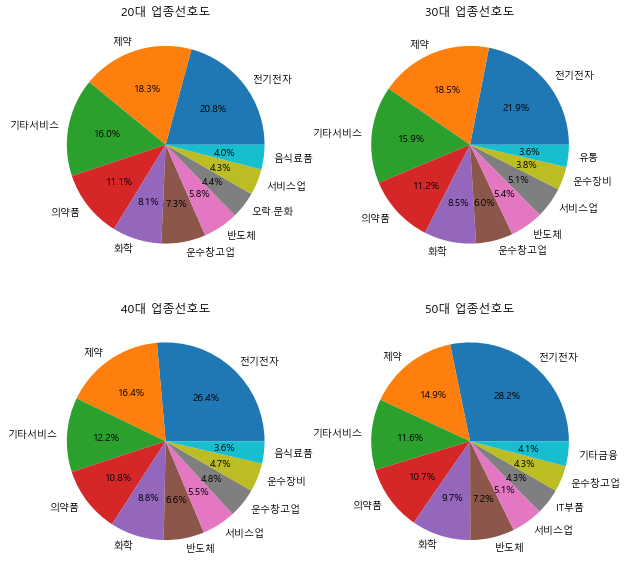

In [83]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

df_ax1 = han_merge['업종명'][han_merge['동일나이군구분코드']==20].value_counts().head(10)
df_ax2 = han_merge['업종명'][han_merge['동일나이군구분코드']==30].value_counts().head(10)
df_ax3 = han_merge['업종명'][han_merge['동일나이군구분코드']==40].value_counts().head(10)
df_ax4 = han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts().head(10)

labels_ax1 = han_merge['업종명'][han_merge['동일나이군구분코드']==20].value_counts().index[0:10]
labels_ax2 = han_merge['업종명'][han_merge['동일나이군구분코드']==30].value_counts().index[0:10]
labels_ax3 = han_merge['업종명'][han_merge['동일나이군구분코드']==40].value_counts().index[0:10]
labels_ax4 = han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts().index[0:10]

ax1.pie(df_ax1, labels=labels_ax1, autopct='%1.1f%%')
ax2.pie(df_ax2, labels=labels_ax2, autopct='%1.1f%%')
ax3.pie(df_ax3, labels=labels_ax3, autopct='%1.1f%%')
ax4.pie(df_ax4, labels=labels_ax4, autopct='%1.1f%%')

ax1.set_title('20대 업종선호도')
ax2.set_title('30대 업종선호도')
ax3.set_title('40대 업종선호도')
ax4.set_title('50대 업종선호도')

plt.show()

### 나이군별 선호하는 투자 업종 분석 결론:
### 기성세대(40대, 50대) 의 투자 비중은 전기전자 업종이 가장 높고, 그 다음 제약, 기타 서비스 순이었습니다. MZ세대(20대, 30대) 역시 전기전자 업종의 투자 비중이 가장 높았으나, 그 비중은 다른 세대에 비해 적은 대신 제약, 기타 서비스 업종에 좀 더 투자 비중이 높았습니다.
### 한국투자증권 데이터 조사 시기는 코로나19의 유행으로 제약 종목과 진단서비스(기타서비스) 업종이 테마종목으로 지정되어 투자금이 몰리는 시기였습니다. 따라서, MZ세대가 다른 세대에 비해 테마(trend)에 따라 투자하는 성향이 있다는 것을 확인할 수 있었습니다.

### 2. 나이군별로 선호하는 시장(kospi, kosdaq)이 무엇이고, 투자한 종목의 시가총액은 어떻게 되는지 추가 분석을 진행하였습니다.

In [84]:
han_cos_cnt = han_merge.groupby('동일나이군구분코드')['거래소구분코드'].value_counts()
han_cos_cnt = pd.DataFrame(han_cos_cnt)
han_cos_cnt.columns = ['거래건수']
han_cos_cnt = han_cos_cnt.reset_index()
han_cos_cnt['거래소구분'] = han_cos_cnt['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

han_cos_total = han_merge.groupby(['동일나이군구분코드', '거래소구분코드'])['총체결금액'].sum()
han_cos_total = pd.DataFrame(han_cos_total)
han_cos_total = han_cos_total.reset_index()
han_cos_total['거래소구분'] = han_cos_total['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

In [85]:
han_cos_cnt

,동일나이군구분코드,거래소구분코드,거래건수,거래소구분
0,20,3,111665,코스닥
1,20,2,87525,코스피
2,30,3,178970,코스닥
3,30,2,148438,코스피
4,40,3,104365,코스닥
5,40,2,104146,코스피
6,50,3,51910,코스닥
7,50,2,50968,코스피


In [86]:
v1 = list(han_cos_cnt['거래건수'])
v1

[111665, 87525, 178970, 148438, 104365, 104146, 51910, 50968]

In [87]:
attr = sorted( list( han_cos_cnt['동일나이군구분코드'].unique() ) )
v1 = list(han_cos_cnt['거래건수'][han_cos_cnt['거래소구분코드']==2])
v2 = list(han_cos_cnt['거래건수'][han_cos_cnt['거래소구분코드']==3])

bar = Bar('나이군별 거래건수',width=1000)
bar.add('코스피', attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('코스닥', attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [88]:
attr = sorted( list( han_cos_total['동일나이군구분코드'].unique() ) )
v1 = list(han_cos_total['총체결금액'][han_cos_total['거래소구분코드']==2])
v2 = list(han_cos_total['총체결금액'][han_cos_total['거래소구분코드']==3])

bar = Bar('나이군별 총체결금액',width=1000)
bar.add('코스피', attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])
bar.add('코스닥', attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

In [90]:
han_total = han_merge.groupby('동일나이군구분코드')['시가총액'].mean()
han_total = pd.DataFrame(han_total)
han_total.columns = ['시가총액평균']
han_total = han_total.reset_index()

In [91]:
attr = list( han_total['동일나이군구분코드'] )
v = list(han_total['시가총액평균'].round())

bar = Bar('나이군별 거래한 종목의 시가총액평균',width=1000)
bar.add('나이군별', attr, v, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 100],mark_point=["max","min"])

###  나이군별로 선호하는 시장(kospi, kosdaq), 투자한 종목의 시가총액 비교 결과:
### MZ 세대는 코스피 종목보다 코스닥 종목에 더 많이 거래하고 투자한 반면, 기성 세대는 코스피와 코스닥 종목의 투자 비중이 거의 비슷했습니다. 또한, MZ 세대는 시가총액이 작은 종목에 더 많이 투자한 반면, 기성 세대는 시가총액이 큰 종목에 더 많이 투자하였습니다.
### 일반적으로, 코스피 종목보다 코스닥 종목이, 시가총액이 큰 종목보다 작은 종목이 리스크는 크지만 투자보상은 크다는 것을 고려하면, MZ 세대는 기성 세대보다 공격적인 투자로 적극적으로 수익을 창출하고자 한다는 것을 알 수 있었습니다.

# 3. Modeling

## 3.1 K-means (for 신한은행 데이터)

### ◆ 클러스터링을 통한 특성분류

### ◆데이터 준비

kmeans 군집분석을 사용해서 MZ세대의 특징을 search.

코로나 이후의 MZ세대의 특징을 분류하기 위해 가장 최신의 데이터인 21년03월 데이터를 이용해서 분류.

앞선 시각화 분석 단계에서 MZ세대의 데이터는 코로나 이후 큰 증감이 없음.
 

In [93]:
shin3=shin2.loc[(shin2.기준년월==202103)&(shin2.MZ여부=='MZ세대'),]

In [94]:
mz=shin3.drop(['기준년월','MZ여부'],axis=1).reset_index(drop=True)
mz.head()

,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,강남구,역삼동,2,1,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0
1,강남구,역삼동,2,2,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0
2,강남구,역삼동,3,1,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0
3,강남구,역삼동,3,1,1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0
4,강남구,역삼동,3,2,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0


## ◆파생변수 생성

#### ※ 총 수신 값이 있지만, 총소비가 0인 경우는 입출금통장에 입금하고 해당 월에 지급이 없는 저축용도 통장이거나 입출금 통장 없이 예금, 적금만 하는 고객일 수 있음.

#### ※ 총수신은 입출금통장 포함이기 때문에 대부분의 사람이 총수신 값을 가지고 있으며 잔액이 30만원 등과 같이 작은 경우가 많음. 그러나 예금, 투자 상품은 상대적으로 큰 금액으로 가입하기 때문에 총수신은 예금, 투자 상품의 평균 값보다 작게 나올 수 있음.

### ▶신한 은행 데이터 컬럼에 대한 데이터 설명을 참고하여 이와 관련된 파생변수를 생성.

### ▶ 총 수신금액을 총수신금액과 관련된 컬럼(예적금금액,신탁금액, 수익증권금액) 및 총소비금액을 비교해서 더 높은 경우 1 아니면 0으로 하는 파생변수를 생성.

In [95]:
print('입출금통장:',mz.loc[(mz.총소비금액==0)&(mz.총수신금액!=0),'총수신금액'].count())
print('예적금통장:',mz.loc[mz.총수신금액 < mz.예적금금액,'총수신금액'].count())
print('신탁투자통장:',mz.loc[mz.총수신금액 < mz.신탁금액,'총수신금액'].count())
print('수익증권투자통장:',mz.loc[mz.총수신금액 < mz.수익증권금액,'총수신금액'].count())

입출금통장: 17104
예적금통장: 27804
신탁투자통장: 99
수익증권투자통장: 62


### ▶ 총소비금액이 0이지만 총수신금액이 0이 아닌 경우가 17104건으로 이를 '저축용도'라는 파생변수를 생성.
### ▶ 예적금금액이 총소비금액보다 큰 경우가 27804건으로 이를 '예적금용도'라는 파생변수로 생성.

In [96]:
mz2=mz.copy()
mz2['저축용도']=np.nan
mz2['예적금용도']=np.nan
mz2['저축용도']=np.where((mz.총소비금액==0)&(mz.총수신금액!=0),1,0)
mz2['예적금용도']=np.where(mz.총수신금액 < mz.예적금금액,1,0)
mz2.head()

,지역구,법정동,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,강남구,역삼동,2,1,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0,0,0
1,강남구,역삼동,2,2,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0,0,0
2,강남구,역삼동,3,1,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0,0,1
3,강남구,역삼동,3,1,1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0,0,0
4,강남구,역삼동,3,2,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0,0,1


In [97]:
z=mz2.loc[mz2.나이==2] #20대만 추출
m=mz2.loc[mz2.나이==3] #30대만 추출

In [98]:
z1=z.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제
m1=m.drop(['나이'],axis=1).reset_index(drop=True) #나이컬럼 삭제

## ◆기술통계량 확인

In [99]:
z1.loc[:,'급여입금':].describe()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
count,"31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00","31,825.00"
mean,"33,420.10",0.00,28.85,"914,647.01","2,450,412.95","2,082,060.35","4,311.73","12,358.56","47,012.27","557,484.93",0.00,"409,054.79",0.30,0.38
std,"282,213.94",0.00,"2,972.39","746,562.83","1,986,358.98","2,915,432.82","261,292.97","483,218.06","1,252,838.37","7,112,779.60",0.00,"6,407,818.29",0.46,0.48
min,0.00,0.00,0.00,0.00,"1,378.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,"1,076,467.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,"967,050.00","1,925,587.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,"1,428,170.00","3,252,170.00","3,616,666.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,"4,277,427.00",0.00,"316,000.00","4,757,358.00","20,578,259.00","30,087,627.00","33,275,268.00","33,707,900.00","54,486,571.00","179,283,750.00",0.00,"177,822,222.00",1.00,1.00


In [100]:
m1.describe()

,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
count,"39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00","39,810.00"
mean,1.50,0.11,"347,158.48",802.26,24.11,"1,412,818.16","4,257,935.04","3,825,723.78","80,431.89","25,478.63","1,301,918.48","4,950,835.58","85,396.90","1,855,347.27",0.19,0.40
std,0.50,0.31,"1,010,353.12","72,188.23","2,779.95","923,114.14","3,399,653.81","4,583,768.71","996,100.90","615,317.66","8,196,035.57","23,534,329.59","4,512,159.18","15,240,652.50",0.39,0.49
min,1.00,0.00,0.00,0.00,0.00,0.00,"1,592.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,"840,548.50","2,005,464.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,0.00,0.00,0.00,"1,473,846.00","3,317,844.00","2,728,348.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,0.00,0.00,0.00,0.00,"2,032,513.75","5,353,378.00","6,452,124.75",0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,2.00,1.00,"6,789,297.00","9,607,760.00","331,904.00","5,489,070.00","31,377,244.00","40,105,664.00","44,361,232.00","51,505,747.00","108,276,096.00","336,999,920.00","322,639,172.00","232,285,714.00",1.00,1.00


#### ▶MZ세대의 기술통계량을보면 30대와 20대 간 절대적인 규모의 차이가 존재했습니다. 따라서 20대와 30대를 구분하는 것보다 20대와 30대를 따로 나누어서 클러스터링을 하는 것이 20대와 30대의 특징을 더 잘 구분할 것으로 보입니다. 

In [101]:
z_clustering=z1.loc[:,'급여입금':] # 클러스터링을 위한 변수 추출
z_clustering.head()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,0,0,2281097,5125045,0,0,0,0,0,0,0,0,0
1,0,0,0,1365430,1145088,0,0,0,0,0,0,0,0,0
2,0,0,0,1838629,7328443,8146428,0,0,0,0,0,0,0,1
3,0,0,0,1288101,3137815,0,0,0,0,0,0,0,0,0
4,0,0,0,1434746,1028505,0,0,0,0,0,0,0,0,0


## ◆데이터 표준화

In [102]:
sc=StandardScaler() #표준화
z_clustering_sc=sc.fit_transform(z_clustering)

## ◆ Kmeans 모델 생성(20대)

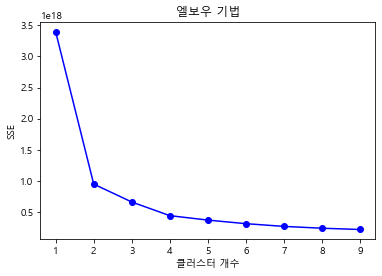

[3.3926142780377e+18, 9.51815138071245e+17, 6.649631582582217e+17, 4.461562386875359e+17, 3.750436171014705e+17, 3.174150520456356e+17, 2.7395278968956006e+17, 2.4461302331555286e+17, 2.2421358526084698e+17]


In [103]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(z_clustering,10)

#### ▶최적의 클러스터링 갯수를 찾기 위해 엘보우 기법을 사용했습니다.
#### ▶엘보우기법의 결과 적절한 k값은 4로 나타났습니다.

## ◆ Kmeans 군집분석 (20대)

In [104]:
kmeans=KMeans(n_clusters=4,random_state=1)
clusters=kmeans.fit(z_clustering_sc)
z_clustering['cluster']=clusters.labels_
# print(z_clustering['cluster'].unique())
z_clustering
z_clustering.groupby('cluster').count()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245
1,148,148,148,148,148,148,148,148,148,148,148,148,148,148
2,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
3,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098


In [105]:
z_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,"32,614.76",0.00,26.68,"1,304,855.43","2,181,844.93","424,326.41",0.00,243.42,"1,632.73","132,296.19",0.00,"2,237.66",0.00,0.00
1,"2,037,470.67",0.00,0.00,"2,192,121.50","5,871,907.04","4,475,553.99","544,317.45","144,696.03","9,841,295.15","89,889,037.06",0.00,"85,961,994.40",0.00,0.22
2,"34,877.02",0.00,54.55,"1,245,024.50","3,172,043.12","4,937,953.04","4,999.29","32,570.93","1,878.76","260,341.43",0.00,"23,877.80",0.03,0.95
3,0.00,0.00,0.00,0.00,"1,827,716.74","534,279.88",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.13


In [106]:
z2=z1.copy()

z2['cluster']=z_clustering['cluster']

## ◆ Kmeans 군집분석  시각화 (20대)

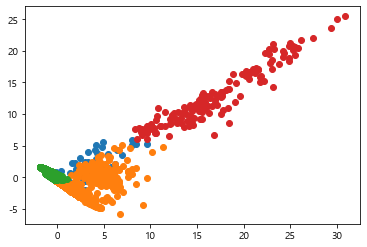

In [107]:
X=z_clustering_sc
pca=PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df
pca_df['cluster']=z_clustering['cluster']

%matplotlib inline

for i in z_clustering['cluster'].unique():
    tmp=pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

## ◆ Kmeans 군집분석 결과(20대)

In [108]:
kmeans=KMeans(n_clusters=4,random_state=1)
clusters=kmeans.fit(z_clustering_sc)
z_clustering['cluster']=clusters.labels_
# print(z_clustering['cluster'].unique())
z_clustering
z_clustering.groupby('cluster').count()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245,11245
1,148,148,148,148,148,148,148,148,148,148,148,148,148,148
2,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
3,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098,9098


In [109]:
z_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,"32,614.76",0.00,26.68,"1,304,855.43","2,181,844.93","424,326.41",0.00,243.42,"1,632.73","132,296.19",0.00,"2,237.66",0.00,0.00
1,"2,037,470.67",0.00,0.00,"2,192,121.50","5,871,907.04","4,475,553.99","544,317.45","144,696.03","9,841,295.15","89,889,037.06",0.00,"85,961,994.40",0.00,0.22
2,"34,877.02",0.00,54.55,"1,245,024.50","3,172,043.12","4,937,953.04","4,999.29","32,570.93","1,878.76","260,341.43",0.00,"23,877.80",0.03,0.95
3,0.00,0.00,0.00,0.00,"1,827,716.74","534,279.88",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.13


### ▶ Z세대 클러스터링 결과:

#### ▶0번과 2번 클러스터가 가장 다수의 고객 집단으로 나타났습니다.

#### ▶1번 클러스터는 급여가 다른 세대에 비해 월등히 높고 그 집단의 크기가 작은것으로 보아 직장인 집단으로 판단됩니다.

#### ▶3번 클러스터는 총수신금액과 예적금금액만이 존재하는 저축용도 통장 집단으로 판단됩니다. 



###  ● 1번 클러스터 :직장인 (약0.004%)

####  ▶ 1번 클러스터는 소수집단이고 금융자산의 크기도 다른 클러스터와 차이가 커 30대 그룹과 연관짓는 것이 좋을 것으로 보입니다.



###  ● 3번 클러스터 : 주거래은행이 아닌 집단(약29%)



#### ▶3번 클러스터는 총수신금액과 예적금금액을 제외한 나머지 변수가 0인 집단이라는 점에서 이들은 신한은행이 주거래 은행이 아닌 그룹으로 판단됩니다. 이 집단은 각 은행마다 주거래 은행이 아님에도 계좌를 보유하고 있는 20대의 규모를 파악할 수 없으므로 특별한 특징을 밝혀낼 수 는 없습니다. 다만, 이들의 규모가 전체의 약29%정도를 차지한다는 점에서 상당수의 20대가 이러한 형태를 띄고 있다고 유추할 수 있습니다.  따라서 이들이 적극적으로 다른 클러스터로 이동시킬 필요가 있습니다. 

#### ex : 휴면계좌를 대상으로 come-back 이벤트, 휴면계좌 주기적으로 입출금 사용시 페이백, 1년이상 입출금 내역 미보유자 우대프로그램, 수익증권 우대 프로그램을 통해 적극적으로 신한은행 계좌를 사용하도록 유도)

####  방치 계좌 통합 또는 휴면계좌 활성화 -> 예적금 또는 저축용 -> 금융상품을 활용할 수 있도록 유도



### 0번 클러스터(-위험감수형-): 급여가 낮고(비정규직or시간제 근로자) 은행상품에 관심이 없는 그룹 (35%) 

#### ▶ 0번 집단은 급여입금과 소비입금이 2번 그룹과 유사하지만 전반적인 수신금액이 낮습니다. 그러나 나머지 변수에서는 2번 클러스터와 비슷한 규모를 보입니다. 이들은 재태크에 관심이 없거나 은행상품을 통한 재태크를 불호하는 타입으로 보입니다. 특히 이들의 예적금 금액이 매우 낮은 것을 보아 이들은 은행 외 투자수단을 선호하는 타입으로 보입니다. 


###  2번 클러스터 (-안전지향형-) :급여가 낮고(비정규직or시간제 근로자) 은행상품에 관심이 많은 그룹 (36%)

#### ▶2번 그룹과 비슷한 소득 지출 규모를 보이는 0번 집단에 비해 전반적인 수신금액이 높습니다.  예적금 금액의 비중이 높은 것으로 보아, 재태크에는 관심이 있으나, 주도적인 자산관리는 피하고 상대적으로 안정적인 예적금이나 펀드를 활용하는 것으로 보입니다. 


### ● 결과

#### ▶ 클러스터링 결과 0번 클러스터와 2번 클러스터가 다수의 20대 특징으로 나타났습니다.

#### ▶ 재태크에 관심이 있지만 안정성을 선호하는 2번 클러스터를 위해 큰 위험부담이 없는 재태크 설계 플래너 서비스와 같은 재태크 초보자를 지원하는 프로그램을 통해 유도할 필요가 있습니다.

#### ▶0번클러스터는 위험을 감수하고 고수익을 원하는 투자그룹으로 추정할 수 있습니다. 하지만 안정적으로 보유하고 있는 자산이 없어 안정적인 자산 관리가 불가능 합니다.  MZ세대는 게임감각 또는 공정하다고 느끼기 때문에 주식투자에 대해 더 높은 관심을 보유했습니다. (뉴스/보고서 자료 존재)
#### ▶ 따라서 이들을 은행상품으로 유도하기 위해서는 공정함 또는 본인의 선택에 의해 이득이 산출되도록 상품을 출시할 필요가 있습니다.          예: 신한은행 응원하는 프로야구팀 순위에 따른 예금금리 적용 => 이를 활용하여 여러 상품을 개발. (모의 주식을 통해 주식의 증가폭에 비례하여 예적금 금리 향상 등)

## ◆ Kmeans 군집분석 (30대)

In [110]:
m_clustering=m1.loc[:,'급여입금':]
m_clustering

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0,0,1
1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0,0,0
2,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0,0,1
3,2195453,0,0,1930210,7077029,7914375,0,0,0,0,0,0,0,1
4,0,0,0,2950305,3935387,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39805,0,0,0,0,7207308,0,0,0,0,0,0,0,1,0
39806,0,0,0,2563707,4085287,6097368,0,0,0,0,0,0,0,1
39807,2858405,0,0,1433172,7721884,0,0,0,0,0,0,0,0,0
39808,0,0,0,1653606,2489795,10358065,0,0,0,0,0,0,0,1


## ◆ 데이터 표준화

In [111]:
m_clustering_sc=sc.fit_transform(m_clustering)

## ◆ Kmeans 모델 생성(30대)

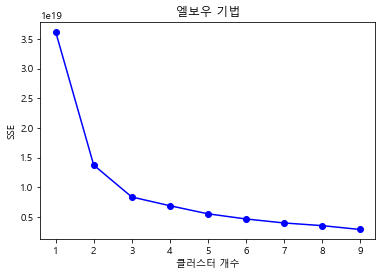

[3.6206059548340064e+19, 1.3727078746782007e+19, 8.346522680203006e+18, 6.874226153825961e+18, 5.509396835330996e+18, 4.637811124858327e+18, 3.9641526372393477e+18, 3.516050939445357e+18, 2.860861374620208e+18]


In [112]:
def elbow(data,length):
    sse=[] #오차제곱합
    for i in range(1,length):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,length),sse,'bo-')
    plt.title('엘보우 기법')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(m_clustering,10)

## ◆ Kmeans 군집분석 (30대)

In [113]:
kmeans=KMeans(n_clusters=5,random_state=1)
clusters=kmeans.fit(m_clustering_sc)
m_clustering['cluster']=clusters.labels_
print(m_clustering['cluster'].unique())
m_clustering
m_clustering.groupby('cluster').count()

[1 4 2 0 3]


,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475
1,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523
2,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392
3,778,778,778,778,778,778,778,778,778,778,778,778,778,778
4,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642


In [114]:
m_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,"2,962,028.92","737,079.51",0.27,0.00,0.00,"34,950.13",0.00,0.00,1.00,0.09
1,"9,769.05",0.00,0.00,"1,616,926.89","3,850,785.39","7,416,820.69","22,297.72","6,427.98","125,578.16","3,580,851.23",0.00,"116,812.98",0.01,1.00
2,"19,886.05",0.00,0.00,"1,612,752.66","3,270,955.04","618,039.45","6,484.58",0.00,"19,444.09","872,212.01",0.00,"15,643.61",0.00,0.00
3,"2,713,572.57","41,051.31",0.00,"2,469,416.05","9,454,489.16","6,519,933.24","2,831,573.01","1,102,672.18","26,326,186.76","115,254,609.29","4,369,730.65","91,728,813.74",0.00,0.16
4,"3,102,973.59",0.00,263.53,"2,537,746.33","11,060,419.86","7,064,419.35","161,547.60","17,317.91","8,034,990.27","11,937,962.79",0.00,"162,104.28",0.00,0.14


In [115]:
m2=m1.copy()

m2['cluster']=m_clustering['cluster']

## ◆ Kmeans 군집분석  시각화 (30대)

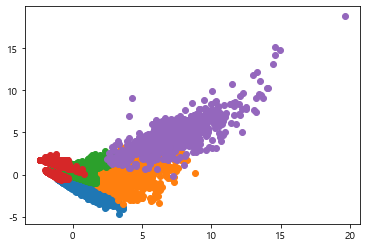

In [116]:
#PCA를 통한 차원 축소
X1=m_clustering_sc
pca=PCA(n_components=2)
pca.fit(X1)
x_pca = pca.transform(X1)
pca_df2 = pd.DataFrame(x_pca)
pca_df2
pca_df2['cluster']=m_clustering['cluster']

#클러스터 시각화
%matplotlib inline

for i in m_clustering['cluster'].unique():
    tmp=pca_df2.loc[pca_df2['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

## ◆ Kmeans 군집분석 결과 (30대)

In [117]:
kmeans=KMeans(n_clusters=5,random_state=1)
clusters=kmeans.fit(m_clustering_sc)
m_clustering['cluster']=clusters.labels_
print(m_clustering['cluster'].unique())
m_clustering
m_clustering.groupby('cluster').count()

[1 4 2 0 3]


,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475,7475
1,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523,14523
2,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392,13392
3,778,778,778,778,778,778,778,778,778,778,778,778,778,778
4,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642


In [118]:
m_clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액,저축용도,예적금용도
cluster,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,"2,962,028.92","737,079.51",0.27,0.00,0.00,"34,950.13",0.00,0.00,1.00,0.09
1,"9,769.05",0.00,0.00,"1,616,926.89","3,850,785.39","7,416,820.69","22,297.72","6,427.98","125,578.16","3,580,851.23",0.00,"116,812.98",0.01,1.00
2,"19,886.05",0.00,0.00,"1,612,752.66","3,270,955.04","618,039.45","6,484.58",0.00,"19,444.09","872,212.01",0.00,"15,643.61",0.00,0.00
3,"2,713,572.57","41,051.31",0.00,"2,469,416.05","9,454,489.16","6,519,933.24","2,831,573.01","1,102,672.18","26,326,186.76","115,254,609.29","4,369,730.65","91,728,813.74",0.00,0.16
4,"3,102,973.59",0.00,263.53,"2,537,746.33","11,060,419.86","7,064,419.35","161,547.60","17,317.91","8,034,990.27","11,937,962.79",0.00,"162,104.28",0.00,0.14


### ● 0번클러스터: 주거래 은행이 아닌 집단 (약19%)

#### ▶20대 3번클러스터와 유사합니다.  총소비금액이 없고 총수신금액과 예적금 금액만이 존재합니다.  담보대출 금액이 다소 있으나,  매우 낮은편입니다.


### ●1번클러스터 :  위험회피형(약39%)

#### ▶ 1번 그룹은 다른 그룹에 비해 급여입금액이 낮았지만 총소비와 수신금액은 2번 그룹과 유사했습니다. 이 그룹은 클러스터 중 가장 예적금 금액이 높았지만, 다른 은행 수신상품에 비해 대출금액이 높았습니다. 담보대출금액 중 주택대출금액과 전세자금대출액의 비중이 낮은 것을 보아 생활지원형 대출일 가능성이 있습니다.  또한, 대출로인한 부담이 가장 높은 그룹입니다. 


### ●2번클러스터 :  위험 감수형 (약34%)

#### ▶1 번 클러스터와 비교했을 때  급여가 더 높지만 소비와 수신금액은 유사했습니다. 그러나 전반적인 은행수신상품과 대출상품의 이용이 낮았습니다. 대출금액이 낮다는 점에서 주로 생활에 여유자금이 있고 주요 투자 수단이 은행보다는  수익률이 더 높은 외부 (주식, 코인)일 가능성이 높습니다.  



### 3번 클러스터 : 전세구매 대출형  (0.02%)

#### ▶ 유일하게 가맹점 매출입금이 존재하는 그룹인것으로 보아 자영업자가 포함되었음을 추측할 수 있습니다.
#### ▶ 급여입금액이 높은편이고 은행 수신상품의 규모도 다른 클러스터에 비해 높은 것으로 보아, 적극적으로 은행 수신상품을 이용하는 것으로 보입니다.
#### ▶ 그러나 담보대출금액과 신용대출금액도 매우 높은 편입니다. 부채비율이 지나치게 높아 금리상승시 가장 위험할 수 있는 집단입니다.



### 4번 클러스터 : 안정적인 고수익 지향형  (0.09%)

#### ▶4번클러스터는 급여입금액이 크고 총소비금액과 총수신금액은 3번클러스터와 유사합니다. 하지만 은행상품은 3번클러스터에 비해 많이 낮은편에 속합니다. 이들은  전세자금대출액이 낮았고 전반적인 은행 수신상품 규모가 작은 점을 감안하면 여유자금이 있고 재태크를 주로 (주식, 코인)등을 통해 진행하는 그룹임을 짐작할 수 있습니다.


### ▶ 결과

#### ▶ 20대와 유사하게 위험감수형과 위험회피형 그룹이 비슷하게 나타났습니다. 하지만 30대의 경우 급여수준이 더 높아 20대에 비해 규모가 크고 상대적으로 능동적인 투자가 가능한 신탁금액의 비중이 높았습니다. 이러한 점을 고려했을 때,  30대는 공통적으로 주도적인 자산관리를 선호함을 알 수 있습니다.  
#### => 능동적으로 본인의 판단하에 투자하는 것을 선호하는 30대의 특성을 살려 투자 컨설팅을 통해 관심사에 관한 정보를 전달하되, 판단은 고객의 선택에 맡기는 서비스 개발.


#### ▶ 여유자금이 있는 그룹일수록 수신상품에 소극적이였습니다.  이는 주식, 가상화폐 등에 비해 투자를 했을 때 수익이 발생하지 않는다는 것을 의미합니다.  큰 규모의 투자를 통해 높은 수익을 창출할 수 있는 은행 상품 개발이 필요합니다.


## 3.2 Decision Tree (for 신한은행 데이터)

**Decision Tree** 모델을 활용하여 MZ세대를 반응변수로 두고 Feature Importances를 확인해보겠습니다.     
이를 통해, MZ세대를 구분지을 수 있는 가장 큰 특징이 무엇인지 분석해보도록 하겠습니다

### 3.2.1 Data Scaling

In [119]:
bc.drop(['연령'],axis=1,inplace=True)
bc.drop(['품목대분류명','품목중분류명'],axis=1,inplace=True)

# 명목형 변수 더미화 (가구생애주기 컬럼만을 더미화)
x = pd.get_dummies(bc.iloc[ : , 0:-1 ])
y = bc.iloc[ : , -1 ]

# 훈련 데이터와 테스트 데이터를 분리 합니다. + 정규화 
from  sklearn.preprocessing  import MinMaxScaler

x_scaled = MinMaxScaler().fit(x).transform(x)

from  sklearn.model_selection  import   train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
print(x_train.shape)  # (415437, 12)
print(x_test.shape)  # (103860, 12)
print(y_train.shape)  # (415437,)
print(y_test.shape) # (103860,)

(415437, 12)
(103860, 12)
(415437,)
(103860,)


+ 1. 반응변수(MZ세대)와의 다중공선성 문제로 인해 연령 컬럼을 삭제해두었습니다.
+ 2. 품목명의 경우 대분류 : 13개 , 중분류 : 50개가 있기 때문에 대분류코드, 중분류코드 컬럼을 남겨두고 명목형변수 컬럼인 대분류명과 중분류명을 삭제해두었습니다.   
+ 3. 명목형 변수인 가구생애주기를 더미화해주어 수치형 변수로 바꾸어주었습니다.
+ 4. 훈련데이터와 테스트 데이터를 분리해주었습니다.
+ 5. MinMaxScaler 를 활용하여 수치형 변수를 정규화해주었습니다.

### 3.2.2 Decision Tree Modeling

In [120]:
from  sklearn.tree  import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 모델 훈련
model.fit(x_train, y_train)

# 모델 예측
result = model.predict(x_test)

# 10.   모델 평가
print(model.score(x_train,y_train)) # 훈련데이터 스코어 0.9004710702224404
print(model.score(x_test,y_test))  # 테스트 데이터 스코어 0.8997785480454458
print(model.feature_importances_)

0.9004710702224404
0.8997785480454458
[0.         0.         0.         0.         0.         0.00846695
 0.         0.42552983 0.         0.         0.54770897 0.01829426]


+ Decision Tree Modeling 의 경우 criterion 에서 **엔트로피** 지수를 활용했습니다.    
+ Test Data의 컬럼이 12개이고 MZ 세대의 특징을 결정짓는 가장 중요도가 높은 변수를 구하기 때문에 Max Depth의 경우 3을 주었습니다.
+ 위의 결과, 훈련 데이터의 분류 정확도는 약 90.047%이며, 테스트 데이터의 분류 정확도는 약 89.977% 입니다.
+ 변수 중요도의 경우 [가구생애주기 - 신혼영유아가구] - [가구생애주기 - 1인가구] - [가구생애주기 - 초중고자녀가구] 순으로 중요도를 보입니다.

### 3.2.3 Graphviz 를 활용한 시각화

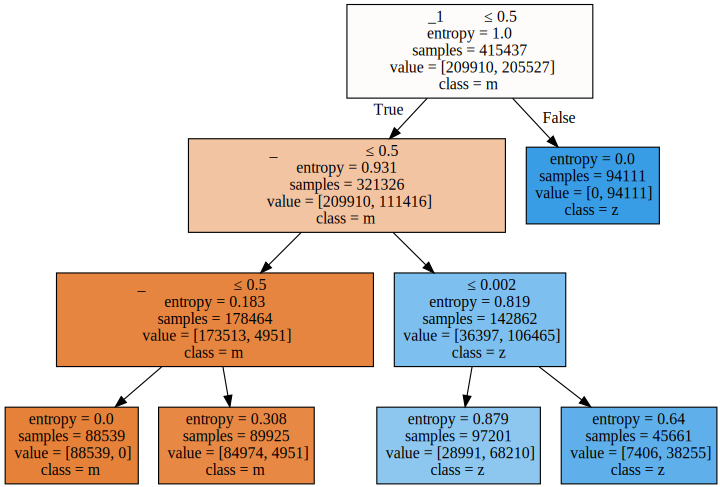

In [121]:
# 11. graphviz 로 의사결정트리 그리기
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

export_graphviz(model, out_file="tree.dot", class_names='mz세대',
                feature_names = x.columns, impurity=True, filled=True,special_characters = True)

with open("tree.dot",encoding='utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

Graphviz 를 활용해 시각화한 결과, MZ세대로 구분지을 수 있는 가장 큰 요소는 가구생애주기(가구유형)의 **1인가구** 유형 유무였습니다.
위에서 분석한 소비 EDA 에서도 MZ세대로 구분지을 수 있는 가장 큰 요소가 1인가구였습니다. 따라서, 머신러닝으로 분류한 결과와 일치함을 알 수 있습니다.

# 4. Conclusion and Insight: 결론 및 아이디어 제시

## 신한없음 (좀 더 찾아봐야함)

## BC카드 분석결과요약

### 4-1. BC카드 분석결과요약

+ MZ 세대 남성의 경우 기타결제(스마트폰 및 온라인) 서비스 및 취미/특기, o2o 서비스, e머니 상품권의 매출이 코로나 전과 비교하여 증가했습니다.     
+ MZ 세대 남성의 경우 가공식품 및 신선/요리재료와 같은 식품 품목의 소비가 증가했습니다.       
            

+ MZ 세대 여성의 경우 가공식품, 신선/요리재료, 건강식품, 음료와 같은 음식류 및 건강관련 상품의 매출이 증가하였습니다.       
+ MZ 세대 여성의 경우 o2o 서비스의 구매건 역시 증가하였습니다.

### 4-2. 맞춤형 체크/신용카드 혜택 및 이벤트 설계

## 한국투자증권 결론 및 활용

<span style="font-weight: bold; font-size: 20px; color:blue">1. 동학개미운동기간 동안 MZ 세대가 기성 세대보다 거래건수가 많았다. 특히, 30대는 거래건수, 총체결금액에서 다른 나이군보다 월등히 많았다. 따라서 동학개미운동의 주역은 MZ 세대인 것을 알 수 있었다.</span>

<span style="font-weight: bold; font-size: 20px; color:red">-> 주식 투자에 관심이 많은 MZ 세대에게 어필하기 위해 주식 투자 관련 정보 및 상품 등을 제공하면, MZ 세대를 고객으로 유치하는데 도움이 될 것이다.</span>
### 예: 기존 금융권이 자사의 입출금 계좌에 등록된 MZ 세대에게 주식 투자가 가능한 CMA 계좌 등을 추천하거나, 계좌 잔고 이자의 일부를 주식 수수로 감면, 리워드 (예: 카카오페이 R 리워드) 등을 제공하여 신규 고객 유치 또는 기존 고객 수성. 

---

<span style="font-weight: bold; font-size: 20px; color:blue">2. MZ 세대는 주식 투자 성향에 있어 기존 세대 보다 테마(trend) 를 따르는 경향이 강하며, 안정적인 투자 보다는 위험하지만 수익률이 높은 투자를 선호한다.</span>
    
<span style="font-weight: bold; font-size: 20px; color:red">-> MZ 세대에게 익숙한 모바일, SNS 등을 통해 최근 주식 테마(trend) 정보를 전달한다. 개인 맞춤형 투자 분석을 통해, MZ 세대 각 개인이 선호하는 테마와 관련된 뉴스를 제공한다.</span>
### 예: 주식 계좌 개설 시 최근 테마 종목 1 주를 제공하는 이벤트를 기획하거나, 계좌 개설 시 선호하는 업종을 선택하면 관련 정보를 제공하는 등을 통해 신규 고객을 유치한다. 또는, 금융사에서는 MZ 세대가 선호하는 업종, 종목을 묶어서 ETF 상품등을 구성한다.